# Lab 6 explore: time series frequency analysis

### Solutions

In [2]:
#Necessary imports
import numpy as np #package for work with arrays and matrices -- this week including some linear algebra
import matplotlib.pyplot as plt #package with plotting capabilities

import pandas as pd
pelts = pd.read_csv("pelt_data.csv")
pelts.head()

,Year,Hare,Lynx
0,1845,19580,30090
1,1846,19600,45150
2,1847,19610,49150
3,1848,11990,39520
4,1849,28040,21230


## Part 1: noise vs. signal

The following script generates a fake signal with periodic components and a noise term, performs a Fourier tranform and plots the power spectrum of the frequencies:

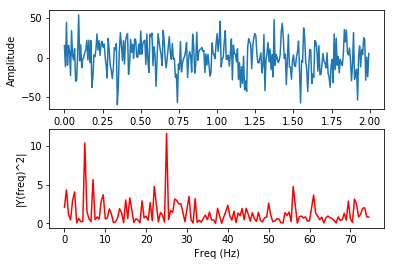

In [5]:
Fs = 150.0  # sampling rate
Ts = 1.0/Fs # sampling interval
Max_time = 2.0 # duration of the signal
t = np.arange(0,Max_time,Ts) # time vector
n = len(t) # length of time vector

# generate a signal with different frequencies
ff1 = 5   # frequency 1 of the signal
ff2 = 25   # frequency 2 of the signal
w1 = 5 # weight of frequency 1
w2 = 5 # weight of frequency 2
w3 = 40 # weight of noise
mu = 0 # mean value
sigma = 0.5 # standard deviation
fake_signal = w1*np.sin(2*np.pi*ff1*t)+ w2*np.sin(2*np.pi*ff2*t) + w3*np.random.normal(mu, sigma, n)

# frequency stuff
k = np.arange(n) # all the frequency indices
frq = k/Max_time  # two sides frequency range
num_freq = np.arange(np.ceil(n/2).astype(int)) # number of frequencies
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(fake_signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,fake_signal)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

Experiment with the code above by increasing the noise weight (variable w3) and report what effect it has on the power spectrum. At what point does the power spectrum no longer have distinguishable frequency peaks for the two periodic components?

Between values of w3 = 40 and 50, the frequency peaks no longer stand out of the flat noise spectrum.

## Part 2: frequency spectrum of the hare and lynx pelt data

Plot the values of hare and lynx pelts contained in the pandas (data frame) pelts as a function of time (Hint: variables in pandas are accessed with a period. e.g. pandas.variable). Then perform Fourier frequency analysis of the two variables (using the above script as a template) and plot the power spectra. Describe the features of the power spectrum in terms of the dominant frequency and any trends or noise. 

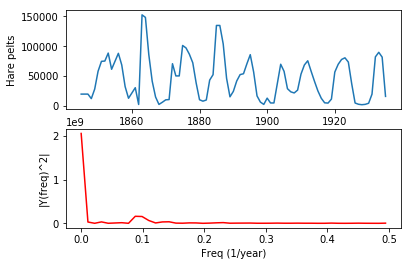

In [10]:
signal = pelts.Hare
t = pelts.Year
n = len(signal)
Fs = 1 # sampling frequency
Ts = 1.0/Fs # sampling interval
Max_time = n


# frequency stuff
k = np.arange(n) # all the frequency indices
frq = k/Max_time  # two sides frequency range
num_freq = np.arange(np.ceil(n/2).astype(int)) # number of frequencies
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,signal)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Hare pelts')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (1/year)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

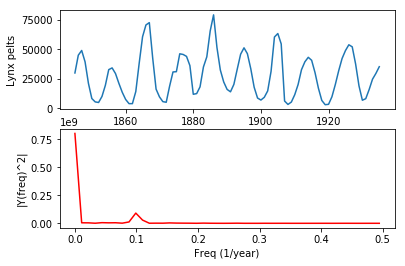

In [9]:
signal = pelts.Lynx
t = pelts.Year
n = len(signal)
Fs = 1 # sampling frequency
Ts = 1.0/Fs # sampling interval
Max_time = n


# frequency stuff
k = np.arange(n) # all the frequency indices
frq = k/Max_time  # two sides frequency range
num_freq = np.arange(np.ceil(n/2).astype(int)) # number of frequencies
frq = frq[num_freq] # non-redundant frequency range

# FFT and power spectrum calculations
Y = np.fft.fft(signal)/n # fft computing and normalization
Y = Y[num_freq]
ps = np.abs(Y)**2 # power spectrum

# plotting the signal and the power spectrum
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,signal)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Lynx pelts')
ax[1].plot(frq,ps[num_freq],'r') # plotting the power spectrum
ax[1].set_xlabel('Freq (1/year)')
ax[1].set_ylabel('|Y(freq)^2|')
plt.show()

Both Lynx and Hare data show a frequency spectrum with a large zero-frequency term (the average value) and a periodic peak at 0.1 (maybe closer to 0.09 for Hare), indicating strong recurrence with period of about 10 years.